###    
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Python Assignment 1 </h1>

<h2 style="text-align: center; color: #012169" markdown="1">Topic</h2>


**The package set up**

In [1]:

# import package os to find the path of your working directory
import wooldridge as woo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.optimize import minimize


# Effects of education on wages
 
From the package AER use the dataset PSID1982 (Cross-section data originating from the Panel Study on Income Dynamics, 1982). In this assignment we will use this data to investigate the effect of eduction on wages for this population. 

Let's first investigate our data and a few relationships in it. This is a little of what I call the motivation part of your regression analysis. This is very simple you will have to do more involved things in your final project. 

* First google PSID1982 to see what each variable. Find the path of where you save this data set in your computer and import it into your Jupyter notebook.

* Then do these two tables show the proportion of women and men in the dataset and the proportion of people that reside in a standard metropolitan statistical area. 

* A third table showing the cross reference table for these two variables.  

In [2]:
# import csv 
PSID1982 = pd.read_csv('PSID1982.csv')

In [3]:
table1_pd = PSID1982['gender'].value_counts()
print(f'freq table: \n{table1_pd}\n')

print(f'Proportion table: \n{table1_pd/table1_pd.sum()}\n')


freq table: 
male      528
female     67
Name: gender, dtype: int64

Proportion table: 
male      0.887395
female    0.112605
Name: gender, dtype: float64



In [4]:
table2_pd = PSID1982['smsa'].value_counts()
print(f'freq table: \n{table2_pd}\n')
print(f'freq table: \n{table2_pd/table2_pd.sum()}\n')

freq table: 
yes    382
no     213
Name: smsa, dtype: int64

freq table: 
yes    0.642017
no     0.357983
Name: smsa, dtype: float64



## Let's add a cross table 

In [5]:
crosstab = pd.crosstab(PSID1982['gender'], PSID1982['smsa'], normalize='all')
crosstab

smsa,no,yes
gender,,
female,0.023529,0.089076
male,0.334454,0.552941


* The following table looks at the correlation table between wages education and experience. 
* What can you say about this correlations? Do they have the expected sign?

In [6]:
# load data named <dataset> and save it in an object with the same name
cormat = PSID1982[['wage','education', 'experience']]

cormat.corr().round(decimals=3)


,wage,education,experience
wage,1.000,0.441,0.090
education,0.441,1.000,-0.222
experience,0.090,-0.222,1.000


## Find averages of relevant variables and some statistics by gender


1. Look at the averages for the whole sample for wage, education, and experience

2. Calculate the above averages, now separated by gender. Add the correlation between wage and education by gender.  


* What can you say about these results? 

* What can you say about the average values for women vs men? 

In [7]:
eductable = PSID1982[['wage','education', 'experience']].mean()
eductable = pd.DataFrame(round(eductable,3), columns = ["Averages"])
eductable

,Averages
wage,1148.039
education,12.845
experience,22.854


In [8]:
bygender = PSID1982.pivot_table(values=['wage','education', 'experience'], index="gender", aggfunc=[np.mean])
PSID1982.groupby('gender')[['wage','education']].corr()
bla = PSID1982.groupby(['gender'])[['wage','education']].corr().iloc[0::2,-1].values[0::1]
bygender['corrwage_educ'] = bla
bygender

mean                         corrwage_educ
        education experience         wage              
gender                                                 
female  12.835821  20.014925   735.820896      0.670763
male    12.846591  23.214015  1200.346591      0.449465

# Graphs 

Let's look at those numbers using graphs. 

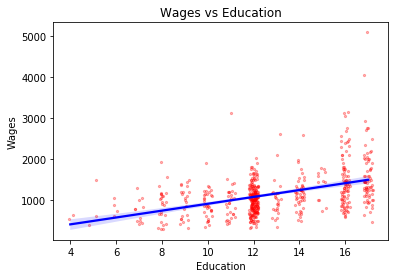

In [9]:
# use line_kws= {'color':'blue'} to change color of the line
# scatter_kws={'color':'red', 's':5} to change color and size of dots

sns.regplot(x='education', y='wage', data=PSID1982,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(title= 'Wages vs Education',
                                                  xlabel="Education", ylabel = "Wages");


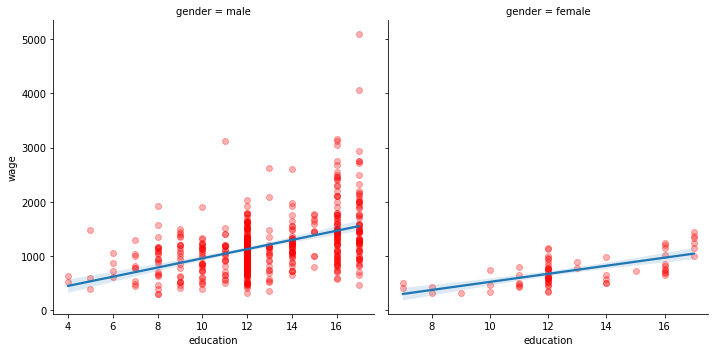

In [10]:
 sns.lmplot(x='education', y='wage', col='gender', scatter_kws={'color':'red','alpha':0.3}, 
            sharex=False,  data=PSID1982).add_legend();

# Simple regression analysis

Now let's use the data to estimate the following equation
$$ wage = \beta_0 + \beta_1*education + u $$

Estimate this equation using the step by step method learned last class, the method that minimizes SSR and the variance covarance method. (3 ways first)

### Equation system results: step-by-step

In [11]:

y = PSID1982['education']
x = PSID1982['wage']
data = {"x": x, "y": y}
datas = pd.DataFrame(data)

# ingredients to the OLS formulas:

sumy = np.sum(y)
sumxy = np.sum((x - np.mean(x)) * (y - np.mean(y)))
sumx2 = np.sum((x - np.mean(x))**2)
sumy2 = np.sum((y - np.mean(y))**2)
x_bar = np.mean(x)
y_bar = np.mean(y)

# manual calculation of OLS coefficients:
b1 = sumxy/sumx2
b0 = y_bar - b1 * x_bar

print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: 0.0023151930390151215

b0: 10.187447047614175



### Function minimization results 


In [12]:
#Create initial values for the Beta parameters
b = np.array([0.5,0.5])

#create a column of constants
k= np.ones(len(x))

# Create function for Sum of square residuals (SSR)
def sse(b,y,x,k):
    return np.sum((y-b[0]*k-b[1]*x)**2)

#Use minimize from scipy.optimize to find the parameters beta that minimize the SSR
resa = minimize(fun=sse,
                args=(y, x, k),
                x0 = b)

# print results
print(resa['x'])

[1.01874956e+01 2.31515076e-03]


### Covariance , variance method
Using the `np.cov(x,y)` and `np.var(x)` functions in Python calculate the $\hat\beta_0, \hat\beta_1$ based on the equation below.
$$\hat\beta_1=\frac{Cov(x,y)}{Var(x)}$$ 
$$\hat\beta_0 = \bar{y} - \hat\beta_1 \bar{x}$$

In [13]:
# ingredients to the OLS formulas:
cov_xy = np.cov(x, y)[1, 0]  # access 2. row and 1. column of covariance matrix
var_x = np.var(x, ddof=1)
x_bar = np.mean(x)
y_bar = np.mean(y)

# manual calculation of OLS coefficients:
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: 0.0023151930390151215

b0: 10.187447047614175



In [14]:
### `ols()` command 

Finally use the `ols()` command to estimate save your estimation in an object called reg and show the summary of your model. 
$$ log(wage) = \beta_0 + \beta_1*education + u $$
What can you say about this new results why is it better to use $log(wages)$?
What is your interpretation of the coeficients and the $R^2$?

SyntaxError: invalid syntax (<ipython-input-14-d896593e6541>, line 3)

In [ ]:
# estimate log-level model:
data = {"x": x, "y": y}
# Put all vectors into a data frame to work with it later 
# and becasue you need that format for the graphs
datas = pd.DataFrame(data)
reg = smf.ols(formula='y ~ x', data=datas)
results = reg.fit()

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')


<style>
div.gray { background-color:#dbdbdb; border-radius: 5px; padding: 20px;}
</style>
<div class = "gray">

**Packages used in this document**

`wooldridge`
`matplot.lib`
`pandas`
`numpy` 
`seaborn`
    

</div>

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>


&nbsp;

In [ ]:
# !jupyter nbconvert --to html nameoffile.ipynb